In [1]:
import pandas as pd

In [2]:
israel_palestine_df = pd.read_csv('israel_palestine_conflict.csv', encoding = 'utf-8')

In [3]:
israel_palestine_df.head()

,Date,Headline,Link
0,2023-12-07,Desperate families of Israeli-American hostage...,https://www.cnn.com/2023/12/07/politics/famili...
1,2023-12-07,Opinion: I reported on Hamas in Gaza for over ...,https://www.cnn.com/2023/12/07/opinions/israel...
2,2023-12-07,Meta’s Oversight Board to weigh in on company’...,https://www.cnn.com/2023/12/07/tech/meta-overs...
3,2023-12-07,"December 5, 2023 Israel-Hamas war",https://www.cnn.com/middleeast/live-news/israe...
4,2023-12-07,"December 6, 2023 Israel-Hamas war",https://www.cnn.com/middleeast/live-news/israe...


## Tokenization and Concordance

In [11]:
import nltk
from nltk import word_tokenize
from nltk.text import Text


nltk.download('punkt')
nltk.download('stopwords')

israel_palestine_df['Headline'].fillna('', inplace = True)

tokens = [word_tokenize(str(headline).lower()) for headline in israel_palestine_df['Headline']]
flat_tokens = [token for sublist in tokens for token in sublist]

text = Text(flat_tokens)

# Find concordances for specific words
violence_concordance = text.concordance('violence', width=100, lines=10)
us_concordance = text.concordance('us', width=100, lines=10)
hostages_concordance = text.concordance('hostages', width=100, lines=10)
civilians_concordance = text.concordance('civilians', width=100, lines=10)
protest_concordance = text.concordance('protests', width=100, lines=10)

          

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Displaying 7 of 7 matches:
cally condemns hamas ’ use of rape and sexual violence as an act of war ’ biden decries hamas sexual
n resolution condemning hamas ’ use of sexual violence sheryl sandberg on hamas attack : rape should
democrat denounces political intimidation and violence after home vandalized with call for ceasefire
 hold their breath israel investigates sexual violence committed by hamas as part of october 7 horro
ians face increasing restrictions and settler violence as gaza war escalates hamas has command node 
ident abbas in west bank amid growing settler violence opinion : israel-hamas war ’ s endgame in gaz
’ us intelligence warned of the potential for violence days before hamas attack trump ’ s turn again
Displaying 10 of 84 matches:
king out on the war in gaza should consider this us officials think gaza ground operation could end 
reaching ‘ dead end ’ in qatar talks harris says us will ‘ under no circumstances ’ permit forced re
history of middle east wartime unit

## Sentiment Analysis

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each post
israel_palestine_df['Sentiment_Score'] = israel_palestine_df['Headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
israel_palestine_df.head(10)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Date,Headline,Link,Sentiment_Score
0,2023-12-07,Desperate families of Israeli-American hostage...,https://www.cnn.com/2023/12/07/politics/famili...,0.6705
1,2023-12-07,Opinion: I reported on Hamas in Gaza for over ...,https://www.cnn.com/2023/12/07/opinions/israel...,0.0000
2,2023-12-07,Meta’s Oversight Board to weigh in on company’...,https://www.cnn.com/2023/12/07/tech/meta-overs...,-0.5994
3,2023-12-07,"December 5, 2023 Israel-Hamas war",https://www.cnn.com/middleeast/live-news/israe...,-0.5994
4,2023-12-07,"December 6, 2023 Israel-Hamas war",https://www.cnn.com/middleeast/live-news/israe...,-0.5994
5,2023-12-07,Amnesty investigation claims US-made weapon us...,https://www.cnn.com/2023/12/06/middleeast/amne...,-0.7717
6,2023-12-07,Exclusive: Blinken says Israel is taking impor...,https://www.cnn.com/2023/12/06/politics/blinke...,0.7783
7,2023-12-06,Calls for ‘balance’ blunt the horrific human t...,https://www.cnn.com/2023/12/06/politics/human-...,-0.9565
8,2023-12-06,Israel military says 2 civilians killed for ev...,https://www.cnn.com/2023/12/05/middleeast/isra...,-0.7650
9,2023-12-06,Jayapal issues new statement that she ‘unequiv...,https://www.cnn.com/2023/12/05/politics/pramil...,-0.9201


## Custom Keyword Search

In [6]:
keywords = ['hostages', 'children','death','hunger','oil', 'americans']

for keyword in keywords:
    israel_palestine_df[keyword] = israel_palestine_df['Headline'].str.contains(keyword, case=False)
israel_palestine_df.head()    

,Date,Headline,Link,Sentiment_Score,hostages,children,death,hunger,oil,americans
0,2023-12-07,Desperate families of Israeli-American hostage...,https://www.cnn.com/2023/12/07/politics/famili...,0.6705,True,False,False,False,False,False
1,2023-12-07,Opinion: I reported on Hamas in Gaza for over ...,https://www.cnn.com/2023/12/07/opinions/israel...,0.0000,False,False,False,False,False,False
2,2023-12-07,Meta’s Oversight Board to weigh in on company’...,https://www.cnn.com/2023/12/07/tech/meta-overs...,-0.5994,False,False,False,False,False,False
3,2023-12-07,"December 5, 2023 Israel-Hamas war",https://www.cnn.com/middleeast/live-news/israe...,-0.5994,False,False,False,False,False,False
4,2023-12-07,"December 6, 2023 Israel-Hamas war",https://www.cnn.com/middleeast/live-news/israe...,-0.5994,False,False,False,False,False,False


In [7]:

keyword_columns = ['hostages', 'children', 'death', 'oil','americans']

# Count the occurrences of True for each keyword
keyword_counts = israel_palestine_df[keyword_columns].sum()

# Display the counts
print("Keyword Counts:")
print(keyword_counts)

Keyword Counts:
hostages     27
children     10
death        13
oil           8
americans    19
dtype: int64


In [14]:
keywords = ['energy','attack','invasion','resistance','americans','aid']

for keyword in keywords:
    israel_palestine_df[keyword]= israel_palestine_df['Headline'].str.contains(keyword, case=False)
israel_palestine_df.head()

,Date,Headline,Link,Sentiment_Score,hostages,children,death,hunger,oil,americans,energy,attack,invasion,resistance,aid
0,2023-12-07,Desperate families of Israeli-American hostage...,https://www.cnn.com/2023/12/07/politics/famili...,0.6705,True,False,False,False,False,False,False,False,False,False,False
1,2023-12-07,Opinion: I reported on Hamas in Gaza for over ...,https://www.cnn.com/2023/12/07/opinions/israel...,0.0000,False,False,False,False,False,False,False,False,False,False,False
2,2023-12-07,Meta’s Oversight Board to weigh in on company’...,https://www.cnn.com/2023/12/07/tech/meta-overs...,-0.5994,False,False,False,False,False,False,False,False,False,False,False
3,2023-12-07,"December 5, 2023 Israel-Hamas war",https://www.cnn.com/middleeast/live-news/israe...,-0.5994,False,False,False,False,False,False,False,False,False,False,False
4,2023-12-07,"December 6, 2023 Israel-Hamas war",https://www.cnn.com/middleeast/live-news/israe...,-0.5994,False,False,False,False,False,False,False,False,False,False,False


In [16]:

keyword_columns = ['energy', 'attack', 'invasion', 'resistance','americans','aid']

# Count the occurrences of True for each keyword
keyword_counts = israel_palestine_df[keyword_columns].sum()

# Display the counts
print("Keyword Counts:")
print(keyword_counts)

Keyword Counts:
energy         0
attack        69
invasion       4
resistance     1
americans     19
aid           24
dtype: int64


israel          340
hamas           259
gaza            172
war             160
2023             61
says             59
biden            53
opinion          51
israeli          50
palestinian      41
attack           41
news             35
hospital         31
october          31
november         30
killed           28
hostage          27
hostages         27
attacks          25
palestinians     23
dtype: int64


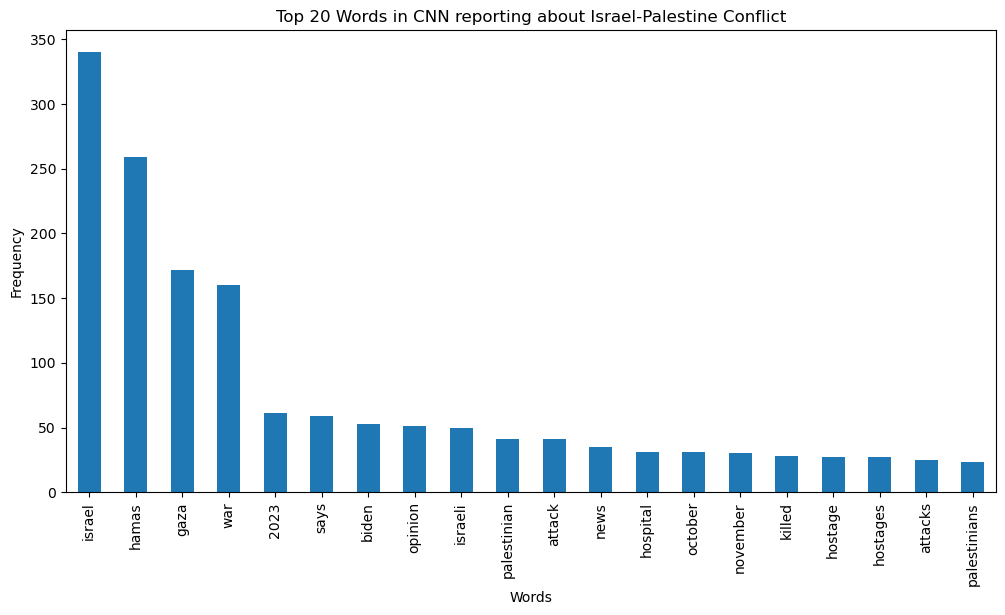

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# exclude words 

corpus = incels_df['Post Content'].astype(str)
# Use TfidfVectorizer with custom stopwords


# Tokenization and counting word frequencies
vectorizer = TfidfVectorizer(stop_words= custom_stop_words, max_features=1000)
x = vectorizer.fit_transform(corpus)

corpus = israel_palestine_df['Headline'].astype(str)

# Tokenization and counting word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
x = vectorizer.fit_transform(corpus)


# Creating a DataFrame with word frequencies
word_freq_df = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Summing up the word frequencies
word_freq_sum = word_freq_df.sum()

# Sorting the words by frequency
sorted_word_freq = word_freq_sum.sort_values(ascending=False)


# Displaying the top N words and their frequencies
top_n_words = 20
print(sorted_word_freq.head(top_n_words))

# Plotting the top N words
plt.figure(figsize=(12, 6))
sorted_word_freq.head(top_n_words).plot(kind='bar')
plt.title('Top {} Words in CNN reporting about Israel-Palestine Conflict'.format(top_n_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
